In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
df = pd.read_csv('../data/data_001.csv', index_col=0)
df

,x,y,z
0,0.000000,0.000000,0.900821
1,0.256457,0.000000,1.273228
2,0.512913,0.000000,1.467639
3,0.769370,0.000000,1.614512
4,1.025826,0.000000,1.873247
...,...,...,...
2495,11.540544,12.566371,0.051119
2496,11.797001,12.566371,0.255046
2497,12.053458,12.566371,0.503383
2498,12.309914,12.566371,0.739053


In [3]:
print(df.iloc[:,0:2].shape)
df.iloc[:,0:2].values

(2500, 2)


array([[ 0.        ,  0.        ],
       [ 0.25645654,  0.        ],
       [ 0.51291309,  0.        ],
       ...,
       [12.05345753, 12.56637061],
       [12.30991407, 12.56637061],
       [12.56637061, 12.56637061]])

In [4]:
print(df.iloc[:,2].values.shape)
df.iloc[:,2].values

(2500,)


array([0.90082085, 1.27322786, 1.4676385 , ..., 0.50338268, 0.73905343,
       0.94240936])

<IPython.core.display.Javascript object>


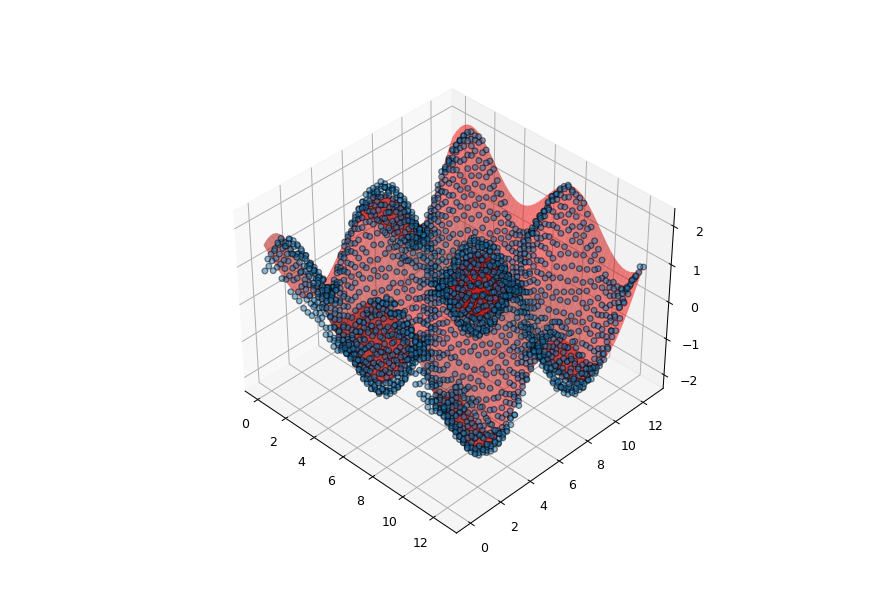

In [5]:
fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')

ax.scatter(df['x'],df['y'],df['z'],
          alpha=0.5,
          edgecolor='black')

In [6]:
sc_x = StandardScaler()
sc_z = StandardScaler()

XY = df.iloc[:,0:2].values
Z = df.iloc[:,2:3].values
xy_s = sc_x.fit_transform(XY)
z_s = sc_z.fit_transform(Z)

regressor = SVR(kernel = 'rbf')
regressor.fit(xy_s,z_s)

/home/saki606/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [7]:
z_pred = regressor.predict(xy_s)
Z_pred = sc_z.inverse_transform(z_pred.reshape(-1,1))


In [8]:
# fig = plt.figure()

num=50

ax.plot_surface(np.array(df.x).reshape(num,num),
                np.array(df.y).reshape(num,num),
                Z_pred.reshape(num,num), 
                color='red', alpha=0.5)

<IPython.core.display.Javascript object>


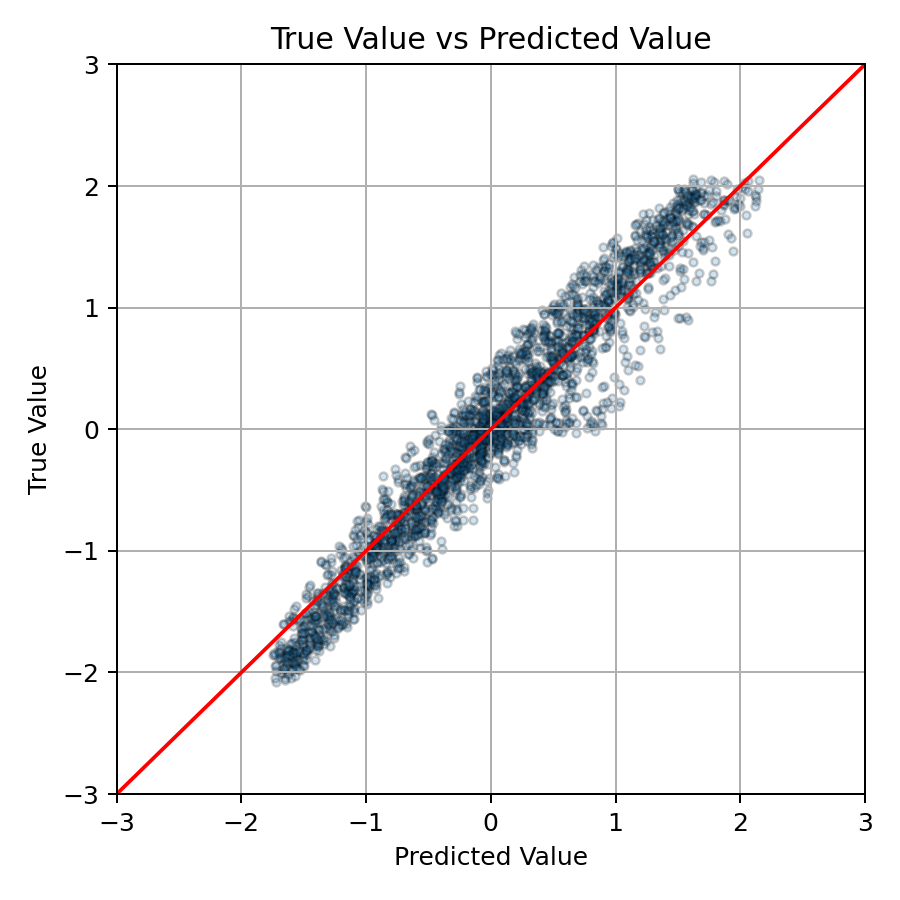

Mean:  -0.000728
std:  0.259
MAE:  0.207
MSE:  0.259
R-squred:  0.933
Maximum Error:  0.856


In [58]:
fig = plt.figure(figsize=(5, 5), dpi=200)

ax = fig.add_subplot(111)

ax.scatter(Z_pred,Z,
          alpha=0.2,
          edgecolor='black',
          s=10)

ax.plot([-10,10],[-10,10],c='r')

plt.title("True Value vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.grid('True')
plt.xlim(-3,3)
plt.ylim( -3,3)
plt.tight_layout()

ZZ = Z-Z_pred
print('Mean: ', np.round(np.mean(ZZ), 6))
print('std: ', np.round(np.std(ZZ),3))
print('MAE: ', np.round(np.mean(np.abs(ZZ)),3))
print('MSE: ', np.round(np.sqrt(sklearn.metrics.mean_squared_error(Z,Z_pred)),3))
print('R-squred: ', np.round(sklearn.metrics.r2_score(Z,Z_pred),3))
print('Maximum Error: ', np.round(np.max(np.abs(ZZ)),3))
